Import the dataset from drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Checking the contents of the dataset


In [2]:
import os

dataset_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/DATASET'

# List the contents of the dataset directory
if os.path.exists(dataset_path):
    print(f"Contents of {dataset_path}:")
    for item in os.listdir(dataset_path):
        print(item)
else:
    print(f"Dataset not found at {dataset_path}")

Contents of /content/drive/MyDrive/OBJECT_DEDUCTION/DATASET:
notes.json
classes.txt
labels
images
labels.cache


Data cleaning


In [3]:
import os

dataset_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/DATASET'
images_dir = os.path.join(dataset_path, 'images')
labels_dir = os.path.join(dataset_path, 'labels')

print("Performing data cleaning checks...")

# Check for missing labels for images
print("\nChecking for missing label files...")
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
missing_labels = []
for image_file in image_files:
    base_name = os.path.splitext(image_file)[0]
    label_file = base_name + '.txt'
    label_path = os.path.join(labels_dir, label_file)
    if not os.path.exists(label_path):
        missing_labels.append(image_file)

if missing_labels:
    print(f"Found {len(missing_labels)} images with missing label files:")
    for missing_label in missing_labels:
        print(missing_label)
else:
    print("No missing label files found for images.")

# Check for images without corresponding image files
print("\nChecking for label files without corresponding images...")
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]
missing_images = []
for label_file in label_files:
    base_name = os.path.splitext(label_file)[0]
    # Assuming images can be .jpg, .jpeg, or .png
    image_found = False
    for ext in ['.jpg', '.jpeg', '.png']:
        image_file = base_name + ext
        image_path = os.path.join(images_dir, image_file)
        if os.path.exists(image_path):
            image_found = True
            break
    if not image_found:
        missing_images.append(label_file)

if missing_images:
    print(f"Found {len(missing_images)} label files with missing image files:")
    for missing_image in missing_images:
        print(missing_image)
else:
    print("No missing image files found for label files.")

# Check for empty label files
print("\nChecking for empty label files...")
empty_label_files = []
for label_file in label_files:
    label_path = os.path.join(labels_dir, label_file)
    if os.path.exists(label_path) and os.path.getsize(label_path) == 0:
        empty_label_files.append(label_file)

if empty_label_files:
    print(f"Found {len(empty_label_files)} empty label files:")
    for empty_file in empty_label_files:
        print(empty_file)
else:
    print("No empty label files found.")



Performing data cleaning checks...

Checking for missing label files...
No missing label files found for images.

Checking for label files without corresponding images...
No missing image files found for label files.

Checking for empty label files...
No empty label files found.


Checking the classes

In [4]:
import os

classes_file_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/DATASET/classes.txt'

if os.path.exists(classes_file_path):
    print(f"Contents of {classes_file_path}:")
    with open(classes_file_path, 'r') as f:
        print(f.read())
else:
    print(f"classes.txt not found at {classes_file_path}")

Contents of /content/drive/MyDrive/OBJECT_DEDUCTION/DATASET/classes.txt:
Bike
Bus
Car
Number plate
Person
Truck



Splitting and copying the dataset

In [42]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
# Define paths
dataset_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/DATASET'
images_dir = os.path.join(dataset_path, 'images')
labels_dir = os.path.join(dataset_path, 'labels')

# Define output directories
output_base_dir = '/content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split'
train_images_dir = os.path.join(output_base_dir, 'train', 'images')
train_labels_dir = os.path.join(output_base_dir, 'train', 'labels')
val_images_dir = os.path.join(output_base_dir, 'val', 'images')
val_labels_dir = os.path.join(output_base_dir, 'val', 'labels')
test_images_dir = os.path.join(output_base_dir, 'test', 'images')
test_labels_dir = os.path.join(output_base_dir, 'test', 'labels')


# Create output directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)


# Get list of image files (assuming image and label files have the same name)
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
random.shuffle(image_files)

# Define the proportions for the split
train_size = 0.8
val_size = 0.1
test_size = 0.1 # This will be the remainder after train and val

# Split the image files
# First, split into training and temp (validation + test)80:20
train_files, temp_files = train_test_split(image_files, train_size=train_size, random_state=42)

# Then, split the temp set into validation and test 10:10
# Adjust the test_size for the second split based on the size of temp_files
# val_size_temp = val_size / (val_size + test_size)
val_files, test_files = train_test_split(temp_files, test_size=test_size/(val_size+test_size), random_state=42)


print(f"Total images: {len(image_files)}")
print(f"Training images: {len(train_files)}")
print(f"Validation images: {len(val_files)}")
print(f"Test images: {len(test_files)}")


# Function to copy files
def copy_files(file_list, src_image_dir, src_label_dir, dest_image_dir, dest_label_dir):
    for image_file in file_list:
        base_name = os.path.splitext(image_file)[0]
        label_file = base_name + '.txt'

        src_image_path = os.path.join(src_image_dir, image_file)
        src_label_path = os.path.join(src_label_dir, label_file)

        dest_image_path = os.path.join(dest_image_dir, image_file)
        dest_label_path = os.path.join(dest_label_dir, label_file)

        # Copy image file
        if os.path.exists(src_image_path):
            shutil.copy(src_image_path, dest_image_path)
        else:
            print(f"Warning: Image file not found: {src_image_path}")

        # Copy label file
        if os.path.exists(src_label_path):
            shutil.copy(src_label_path, dest_label_path)
        else:
            print(f"Warning: Label file not found: {src_label_path}")


# Copy files to train and validation directories
print("Splitting and copying data...")
copy_files(train_files, images_dir, labels_dir, train_images_dir, train_labels_dir)
copy_files(val_files, images_dir, labels_dir, val_images_dir, val_labels_dir)
copy_files(test_files, images_dir, labels_dir, test_images_dir, test_labels_dir)


print("Data splitting complete.")
print(f"Train images: {len(os.listdir(train_images_dir))}")
print(f"Train labels: {len(os.listdir(train_labels_dir))}")
print(f"Validation images: {len(os.listdir(val_images_dir))}")
print(f"Validation labels: {len(os.listdir(val_labels_dir))}")
print(f"Test images: {len(os.listdir(test_images_dir))}")
print(f"Test labels: {len(os.listdir(test_labels_dir))}")

Total images: 99
Training images: 79
Validation images: 10
Test images: 10
Splitting and copying data...
Data splitting complete.
Train images: 79
Train labels: 79
Validation images: 10
Validation labels: 10
Test images: 10
Test labels: 10


In [50]:
import yaml
import os

# Define the path for the YAML file
yaml_file_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/dataset.yaml'

# Define the dataset paths relative to the YOLO training script (will be run from /content)
train_images_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/train/images'
val_images_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/val/images'
test_images_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/test/images' # Add test path

# Get the class names from the classes.txt file
classes_file_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/DATASET/classes.txt'
with open(classes_file_path, 'r') as f:
    class_names = f.read().strip().split('\n')

# Create the data dictionary for the YAML file
data = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,  # Add test path to data dictionary
    'nc': len(class_names),
    'names': class_names
}

# Write the data to the YAML file
with open(yaml_file_path, 'w') as f:
    yaml.dump(data, f)

print(f"YAML configuration file created at: {yaml_file_path}")
print("Contents of dataset.yaml:")
with open(yaml_file_path, 'r') as f:
    print(f.read())

YAML configuration file created at: /content/drive/MyDrive/OBJECT_DEDUCTION/dataset.yaml
Contents of dataset.yaml:
names:
- Bike
- Bus
- Car
- Number plate
- Person
- Truck
nc: 6
test: /content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/test/images
train: /content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/train/images
val: /content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/val/images



# Model Training


In [44]:
!pip install ultralytics --upgrade -q

In [55]:
from ultralytics import YOLO
import torch
# Check for GPU availability and set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load a pre-trained YOLOv8x model
model = YOLO('yolov8n.pt')

# Train the model using the dataset.yaml file with updated parameters
results = model.train(
    data='/content/drive/MyDrive/OBJECT_DEDUCTION/dataset.yaml', # Use the dataset.yaml created earlier
    epochs=100,                 # 🔼 Train longer for better learning
    imgsz=640,                  # 🔻 Smaller image size to reduce GPU load
    batch=4,                    # 🔻 Safer batch size for 4GB VRAM
    device=device,                   # ✅ cuda or cpu
    lr0=0.001,                  # 🔻 Lower initial learning rate
    warmup_epochs=5,           # 🧠 Let model ease into learning
    cos_lr=True,               # 🔁 Cosine learning rate decay
    optimizer='Adam',          # ✅ Stable optimizer
    auto_augment='randaugment',# 🎨 Boost generalization
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,  # 🎨 Color augmentation
    project='/content/drive/MyDrive/OBJECT_DEDUCTION/Object_Deduction',
    name='yolov8n', # Updated name to reflect yolov8n
    exist_ok=True
)

Using device: cuda
Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/OBJECT_DEDUCTION/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=100, perspecti

# Model Evaluation

In [57]:
# Evaluate the model on the test set
metrics = model.val(data='/content/drive/MyDrive/OBJECT_DEDUCTION/dataset.yaml', split='test')

# Print the evaluation metrics
print("Evaluation Metrics on Test Set:")
print(f"  Precision: {metrics.box.p}")
print(f"  Recall: {metrics.box.r}")
print(f"  mAP@0.5: {metrics.box.map50}")
print(f"  mAP@0.5:0.95: {metrics.box.map}")

Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 46.8±20.8 MB/s, size: 93.6 KB)
val: Scanning /content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 19.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.1it/s 0.5s
                   all         10         39      0.885      0.776      0.866      0.674
                  Bike          1          1          1          0      0.332      0.199
                   Bus          1          1       0.44          1      0.995      0.796
                   Car          9         13       0.99      0.923       0.95      0.779
          Number plate         10         15       0.96        0.8      0.931      0.724
                Person          3          7          1      0.935      0.995      0.724
            

# Testing the model

In [94]:
from ultralytics import YOLO
import os
import cv2
from google.colab.patches import cv2_imshow

# Load the trained model

trained_model_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/Object_Deduction/yolov8n_GPU/weights/best.pt'
if not os.path.exists(trained_model_path):
    print(f"Trained model not found at {trained_model_path}. Please check the path.")
else:
    model = YOLO(trained_model_path)

    # Define the directory containing test images
    test_images_dir = '/content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/val/images'

    # Get a list of test image files
    test_image_files = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if not test_image_files:
        print(f"No image files found in {test_images_dir}")
    else:
        print(f"Running inference on {len(test_image_files)} test images...")

        # Run inference on test images
        results = model(test_images_dir)

        # Display results for a few images (e.g., first 5)
        print("\nDisplaying predictions for the first 5 test images:")
        for i, result in enumerate(results[:5]):
            print(f"\nImage {i+1}:")
            # The result object contains the image with bounding boxes and labels
            # You can access the annotated image data
            annotated_img = result.plot() # This draws bounding boxes and labels on the image

            # Display the annotated image
            # cv2_imshow requires the image in BGR format
            cv2_imshow(cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR))

Output hidden; open in https://colab.research.google.com to view.

##Performing Number Plate Extraction using EasyOCR

In [63]:
!pip install easyocr

In [90]:
import cv2
import numpy as np

# Directory to save extracted number plate images
output_number_plates_dir = '/content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates'
os.makedirs(output_number_plates_dir, exist_ok=True)

extracted_plates = []

# Iterate through the inference results
for i, result in enumerate(results):
    # Load the original image
    original_img_path = os.path.join(test_images_dir, os.path.basename(result.path))
    original_img = cv2.imread(original_img_path)

    if original_img is None:
        print(f"Warning: Could not read image file: {original_img_path}")
        continue

    # Get bounding box information
    boxes = result.boxes

    # Filter for 'Number plate' detections
    for box in boxes:
        class_id = int(box.cls)
        confidence = float(box.conf)
        if model.names[class_id] == 'Number plate':
            # Get bounding box coordinates (xyxy format)
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Ensure coordinates are within image bounds
            y1 = max(0, y1)
            y2 = min(original_img.shape[0], y2)
            x1 = max(0, x1)
            x2 = min(original_img.shape[1], x2)

            # Extract the number plate region
            number_plate_img = original_img[y1:y2, x1:x2]

            if number_plate_img.shape[0] > 0 and number_plate_img.shape[1] > 0:
                # Store the extracted image
                extracted_plates.append(number_plate_img)

                # Optionally save the extracted plate image
                plate_filename = f"image_{i+1}_plate_{len(extracted_plates)}.jpg"
                plate_save_path = os.path.join(output_number_plates_dir, plate_filename)
                cv2.imwrite(plate_save_path, number_plate_img)
                print(f"Extracted and saved: {plate_save_path}")
            else:
                 print(f"Warning: Extracted number plate region for image {i+1} is empty.")


print(f"\nTotal number of number plates extracted: {len(extracted_plates)}")

Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_2_plate_1.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_3_plate_2.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_3_plate_3.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_4_plate_4.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_4_plate_5.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_5_plate_6.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_6_plate_7.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_7_plate_8.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDUCTION/extracted_number_plates/image_8_plate_9.jpg
Extracted and saved: /content/drive/MyDrive/OBJECT_DEDU

Processing single image: 886a7e70-01a916bfaa3a7427_jpg.rf.3c530f92ad2726bc8d3e0da189670a0d.jpg

image 1/1 /content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/test/images/886a7e70-01a916bfaa3a7427_jpg.rf.3c530f92ad2726bc8d3e0da189670a0d.jpg: 480x640 3 Cars, 3 Number plates, 1 Truck, 6.7ms
Speed: 2.6ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


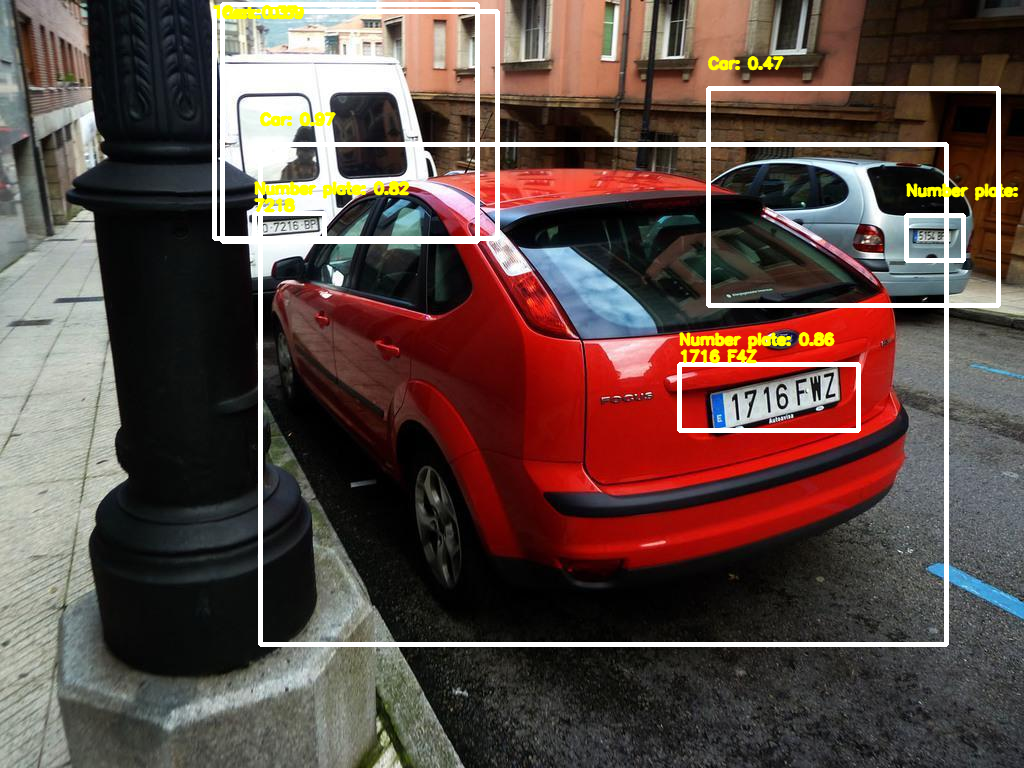


Extracted Number Plate Information:
  Text: 1716 F4Z, Confidence: 0.86, Bbox: (679, 364, 858, 430)
  Text: 7218, Confidence: 0.82, Bbox: (254, 213, 324, 239)
  Text: , Confidence: 0.70, Bbox: (906, 215, 963, 260)


In [107]:
import cv2
import os
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import easyocr

# Load the trained model
# Assuming the trained model is saved in the path used previously
trained_model_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/Object_Deduction/yolov8n_GPU/weights/best.pt'
if not os.path.exists(trained_model_path):
    print(f"Trained model not found at {trained_model_path}. Please check the path.")
else:
    model = YOLO(trained_model_path)

    # Initialize EasyOCR reader
    reader = easyocr.Reader(['en'])
    single_image_path = '/content/drive/MyDrive/OBJECT_DEDUCTION/dataset_split/test/images/886a7e70-01a916bfaa3a7427_jpg.rf.3c530f92ad2726bc8d3e0da189670a0d.jpg'

    if not os.path.exists(single_image_path):
        print(f"Image file not found at {single_image_path}. Please check the path.")
    else:
        print(f"Processing single image: {os.path.basename(single_image_path)}")

        # Load the original image to draw on
        original_img = cv2.imread(single_image_path)

        if original_img is None:
            print(f"Warning: Could not read image file: {single_image_path}")
        else:
            # Perform inference on the single image
            results = model(single_image_path)

            # Draw bounding boxes, text, and confidence on the image
            annotated_img = original_img.copy() # Create a copy to draw on
            extracted_plates_info = []

            # Process results for the single image (assuming one result object per image)
            if results:
                result = results[0]
                boxes = result.boxes

                for box in boxes:
                    class_id = int(box.cls)
                    confidence = float(box.conf)
                    class_name = model.names[class_id]

                    # Get bounding box coordinates (xyxy format)
                    x1, y1, x2, y2 = map(int, box.xyxy[0])

                    # Ensure coordinates are within image bounds
                    height, width = annotated_img.shape[:2]
                    y1 = max(0, y1)
                    y2 = min(height, y2)
                    x1 = max(0, x1)
                    x2 = min(width, x2)

                    # Draw the bounding box on the annotated image
                    color = (255, 255, 255) # White color for bounding box
                    thickness = 4
                    cv2.rectangle(annotated_img, (x1, y1), (x2, y2), color, thickness)

                    # Add the class name and confidence near the bounding box
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 0.5
                    font_thickness = 2
                    text_color = (0,255,255) # text color in BGR

                    # Format the display text
                    display_text = f"{class_name}: {confidence:.2f}"

                    # Get text size to position it correctly
                    (text_width, text_height), baseline = cv2.getTextSize(display_text, font, font_scale, font_thickness)

                    # Position the text slightly above the bounding box, ensuring it's not out of bounds
                    text_position_x = max(x1, 0)
                    text_position_y = max(y1 - 20, text_height + 5)

                    cv2.putText(annotated_img, display_text, (text_position_x, text_position_y), font, font_scale, text_color, font_thickness, cv2.LINE_AA)

                    # If the detected object is a 'Number plate', perform OCR and add the extracted text
                    if class_name == 'Number plate':
                        # Extract the number plate region for OCR
                        number_plate_img = original_img[y1:y2, x1:x2]

                        plate_text = ""
                        if number_plate_img.shape[0] > 0 and number_plate_img.shape[1] > 0:
                            # Apply OCR to the cropped number plate image
                            try:
                                ocr_result = reader.readtext(number_plate_img)
                                # Extract text from OCR result
                                plate_text = " ".join([text[1] for text in ocr_result])
                            except Exception as e:
                                print(f"Error during OCR processing for image {single_image_path}: {e}")

                        extracted_plates_info.append({
                            "bbox": (x1, y1, x2, y2),
                            "text": plate_text,
                            "confidence": confidence
                        })

                        # Add the extracted plate text below the confidence score
                        plate_text_position_y = text_position_y + text_height + 5 # Position below the confidence
                        cv2.putText(annotated_img, plate_text, (text_position_x, plate_text_position_y), font, font_scale, text_color, font_thickness, cv2.LINE_AA)


            # Display the annotated image
            cv2_imshow(annotated_img)

            # Print extracted number plate information
            if extracted_plates_info:
                print("\nExtracted Number Plate Information:")
                for plate_info in extracted_plates_info:
                    print(f"  Text: {plate_info['text']}, Confidence: {plate_info['confidence']:.2f}, Bbox: {plate_info['bbox']}")
            else:
                print("\nNo number plates detected in this image.")